# Data analysis of flow cytometry
This Notebook is a part of the article 'Design and quantification of co-cultures combining heterotrophic yeast with phototrophic sugar-secreting cyanobacteria' by Hasenklever *et al.*

We demonstrate here how the raw **FCS (Flow Cytometry Standard)** file can be loaded and analysed with the focus on visualization, using one of several open source packages in Python: FlowCytometryTools.

Outline (use to jump directly to approperiate section):
1. [Example file](#sectionExample) 
2. [FCS files in general](#sectionFCS)
3. [FlowCytometryTools](#sectionFlowCytometryTools): understanding of how to work with pandas package and data frames is needed

We aim at supporting data processing according to [**FAIR principles**](https://febs.onlinelibrary.wiley.com/doi/10.1002/1873-3468.14067) (Findability, Accessibility, Interoperability, and Reusability).

<a id="sectionExample"></a>

## Example file
For the analysis we are using an exemplary FCS file (mixed_culture.fcs) containing data from an artificial mixture of three microorganisms:
- *Synechocystis* (producing cytoplasmic mVenus),
- yeast *S. cerevisiae*, and
- yeast *U. maydis*. 
Due to the fact that *S. cerevisiae* and *U. maydis* cannot be discriminated by their cell sizes, fluorescence markers have been introduced in the form of cytoplasmic GFP (U. maydis eGFP) and mKate2 (S. cerevisiae mKate2) using basic molecular cloning techniques, which is important for further gating of the sample.

<a id="sectionFCS"></a>

## FCS files in general
Results of the flow cytometry experiment are stored in a standardized format known as the FCS (Flow Cytometry Standard) file. 
An FCS file is divided into several segments, each serving a specific purpose. The main segments are:

1. **Header**: 
The header of an FCS file contains basic information(meta data) about the file format version and the locations (byte offsets) of the start and end positions of the text, data, and optional segments.
2. **Text Segment**:
The TEXT segment contains metadata, i.e., information regarding the sample, the analytical run conditions, the recommended preferences for representing the data, and the number of data sets.
3. **Data Segment**:
The DATA segment contains the digitized values related to the pulse components produced by the signals evoked by the analyzed events’ parameters, plus information about the progressive chronology of their analysis.
4. **Analysis Segment**:
This segment can include results from data analysis or transformations applied to the data. It might store information such as gate definitions, statistical analysis results, or other derived data.
5. **Optional Segments**: 
The optional segment, very rarely implemented, are OTHER and CRC (cyclic redundancy check).The OTHER segment could add data in any format, but it is usually left empty.The CRC segment was created to contain a 16-bit value (checksum) used to verify the absence of errors in the file. 

### Keywords

Any single piece of information concerning the analytical and pre-analytical variables (metadata) is associated in a biunique way with a specific keyword in the TEXT segment.

- BEGINANALYSIS, which shows the position in which the ANALYSIS segment begins.
- BEGINDATA, which shows the position where the DATA segment begins.
- BEGINSTEXT, which shows the position where an additional TEXT segment begins.
- BYTEORD, which shows how the computer creator of the file used bytes to write numbers greater than 255.
- DATATYPE, which shows the typology with which the values contained in the DATA segment are written.
- ENDANALYSIS, which shows the position in which the ANALYSIS segment ends.
- ENDDATA, which shows the position where the DATA segment ends.
- ENDSTEXT, which shows the position in which the TEXT segment ends.
- MODE, which shows the way the data was acquired and subsequently stored (L list mode, C unrelated parameters, U parameters related to pairs).
- NEXTDATA, which shows the position of a data segment possibly following the first one.
- PAR, which shows the number of parameters used.
- PnB, which shows the number of bits or characters with which the values of a given parameter n are written in the DATA segment.
- PnE, which shows the amplification used during the acquisition of a given parameter n.
- PnR, which reports the maximum value that a given parameter n can assume, generally equal to the number of intervals produced by the digitization process.
- TOT, which shows the number of events stored in the data set.
- BTIM and ETIM: Start and end time of data acquisition.
- DATE: Date of data acquisition.
- FIL: Name of the file.
- CYT: Type of flow cytometer used.
- SRC: Source of the sample.
- PnN: Name of the nth parameter (e.g., FL1-H for the first fluorescence channel).
- PnS: Short name or description for the nth parameter.
- PnG: Amplification type for the nth parameter.

For more detailed understanding please refer to this article [The Cytometric File by Claudio Ortolani](https://link.springer.com/chapter/10.1007/978-3-031-10836-5_9).

we demonstrate how to load, read and visualize raw .fcs files containing cytometry data outside the proprietary software using packages in Python. We will use python package flowcytometrytools and flowcal as an example for the reader.

<a id="sectionFlowCytometryTools"></a>
# FlowCytometryTools 
FlowCytometryTools(https://eyurtsev.github.io/FlowCytometryTools/install.html) is a python package written in python 2.7. FlowCytometryTools depends on a few scientific and data analysis libraries: matplotlib (>1.13.1), pandas (>0.12.0), scipy).The simplest way of installing all the required dependencies is by install either canopy or anaconda.Then go to your command terminal and enter the following:



### Import necessary packages for fcs file reading and plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import FlowCytometryTools #as fct
from FlowCytometryTools import FCMeasurement, ThresholdGate, PolyGate

import numpy as np

In [2]:
!python --version

Python 3.9.18


### Step 1: load the FCS file

In [3]:
# Step 1: Define the data file
datafile = r'./mixed_culture.fcs'

# Step 2: Load the FCS file using FlowCytometryTools
sample = FCMeasurement(ID='Test Sample', datafile=datafile)

### Step 2: Perform preliminary analysis of the file
You can get information regarding number of channels or events recorded by running the following commands:

In [4]:
# Step 4: Print some information about the data
print(f"Number of events: {sample.data.shape[0]}")
print(f"Number of channels: {sample.data.shape[1]}")

Number of events: 70475
Number of channels: 32


### Channel names

In [5]:
print(sample.channels)

                     $PnN         $PnS       $PnR  $PnB    $PnE $PnG
Channel Number                                                      
1                   FSC-H        FSC-H   16777216    32  [0, 0]  1.0
2                   FSC-A        FSC-A   16777216    32  [0, 0]  1.0
3                   SSC-H        SSC-H   16777216    32  [0, 0]  1.0
4                   SSC-A        SSC-A   16777216    32  [0, 0]  1.0
5                   FL1-H       FITC-H   16777216    32  [0, 0]  1.0
6                   FL1-A       FITC-A   16777216    32  [0, 0]  1.0
7                   FL2-H      PerCP-H   16777216    32  [0, 0]  1.0
8                   FL2-A      PerCP-A   16777216    32  [0, 0]  1.0
9                   FL3-H        APC-H   16777216    32  [0, 0]  1.0
10                  FL3-A        APC-A   16777216    32  [0, 0]  1.0
11                  FL4-H   APC-A700-H   16777216    32  [0, 0]  1.0
12                  FL4-A   APC-A700-A   16777216    32  [0, 0]  1.0
13                  FL5-H   APC-A7

### Distinguish between data and metadata
Previous understanding how to operate with dataframes will be very useful here

In [6]:
data = sample.data

metadata = sample.meta

Now you can easily extract parts of your data set for chosen channels:

In [7]:
print(sample.data[['FSC-H', 'FSC-A']][:10])

          FSC-H         FSC-A
0  9.773231e+05  8.331612e+05
1  3.737874e+05  2.689003e+05
2  1.428919e+06  1.545022e+06
3  4.496853e+05  3.388732e+05
4  5.663474e+05  1.695579e+06
5  3.720677e+05  2.721125e+05
6  3.935364e+05  2.815530e+05
7  5.190359e+05  4.053988e+05
8  7.348060e+05  5.954755e+05
9  4.822932e+05  3.736405e+05


or get descriptive statistics on each individual channel:

In [8]:
print(sample['FSC-H'].describe())

count    7.047500e+04
mean     6.204610e+05
std      3.292632e+05
min      9.807050e+04
25%      4.097644e+05
50%      5.084888e+05
75%      6.537562e+05
max      3.636966e+06
Name: FSC-H, dtype: float64


In [9]:
sample.channels

$PnN         $PnS       $PnR  $PnB    $PnE $PnG
Channel Number                                                      
1                   FSC-H        FSC-H   16777216    32  [0, 0]  1.0
2                   FSC-A        FSC-A   16777216    32  [0, 0]  1.0
3                   SSC-H        SSC-H   16777216    32  [0, 0]  1.0
4                   SSC-A        SSC-A   16777216    32  [0, 0]  1.0
5                   FL1-H       FITC-H   16777216    32  [0, 0]  1.0
6                   FL1-A       FITC-A   16777216    32  [0, 0]  1.0
7                   FL2-H      PerCP-H   16777216    32  [0, 0]  1.0
8                   FL2-A      PerCP-A   16777216    32  [0, 0]  1.0
9                   FL3-H        APC-H   16777216    32  [0, 0]  1.0
10                  FL3-A        APC-A   16777216    32  [0, 0]  1.0
11                  FL4-H   APC-A700-H   16777216    32  [0, 0]  1.0
12                  FL4-A   APC-A700-A   16777216    32  [0, 0]  1.0
13                  FL5-H   APC-A750-H   16777216    32  [0, 0]  1.0
14                  FL5-A   APC-A750-A   16777216    32  [0, 0]  1.0
15                  FL6-H      PB450-H   16777216    32  [0, 0]  1.0
16                  FL6-A      PB450-A   16777216    32  [0, 0]  1.0
17                  FL7-H      KO525-H   16777216    32  [0, 0]  1.0
18                  FL7-A      KO525-A   16777216    32  [0, 0]  1.0
19                  FL8-H  Violet610-H   16777216    32  [0, 0]  1.0
20                  FL8-A  Violet610-A   16777216    32  [0, 0]  1.0
21                  FL9-H  Violet660-H   16777216    32  [0, 0]  1.0
22                  FL9-A  Violet660-A   16777216    32  [0, 0]  1.0
23                 FL10-H         PE-H   16777216    32  [0, 0]  1.0
24                 FL10-A         PE-A   16777216    32  [0, 0]  1.0
25                 FL11-H        ECD-H   16777216    32  [0, 0]  1.0
26                 FL11-A        ECD-A   16777216    32  [0, 0]  1.0
27                 FL12-H      PC5.5-H   16777216    32  [0, 0]  1.0
28                 FL12-A      PC5.5-A   16777216    32  [0, 0]  1.0
29                 FL13-H        PC7-H   16777216    32  [0, 0]  1.0
30                 FL13-A        PC7-A   16777216    32  [0, 0]  1.0
31              FSC-Width    FSC-Width      10000    32  [0, 0]  1.0
32                   Time         Time  900000000    32  [0, 0]  1.0

 ### Step 3: Visualization
 #### Search for your cell population 
 Search in a FSC-H over FSC-width or FSC-H over SSC-H dot plot and adjust the scale from linear to logarithmic

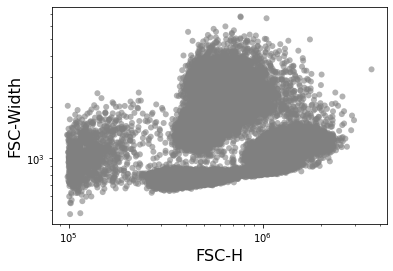

In [10]:
sample.plot(['FSC-H', 'FSC-Width'], kind='scatter', alpha=0.6, color='grey'); 
plt.xscale('log')
plt.yscale('log')

## Detection of phototrophic cells (Synechocystis) 
Phototrophic cells (*Synechocystis*) can be easily distinguished from heterotrophic cells (*U. maydis* and *S. cerevisiae*) based on the **red autofluorescence** of the photosynthetic pigments which is measured in the **APC-H** channel (excitation at 638 nm, emission at 660/10 nm). We attempt to reproduce Fig. 4A from the accompanied manuscript.

In the typical proprietary software of the flow cytometer machine data are first transformed to ease visualization.
Here we show how to use **hlog** transformation. 

In [11]:
# Perform transformation ONLY of the selected channel
tsample = sample.transform('hlog', channels=['APC-H'], b=1.0)

/home/yvain/anaconda3/envs/jove/lib/python3.9/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])


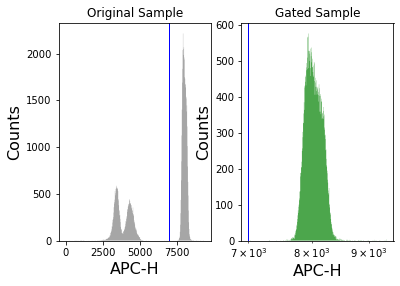

In [12]:
#add the gate
gate_cyano = ThresholdGate(7000.0, ['APC-H'], region='above')
gated_sample_cyano = tsample.gate(gate_cyano)

ax1 = plt.subplot(121);
tsample.plot(['APC-H'], color='grey', gates=[gate_cyano], alpha=0.7, bins=500);
ax1.set_title('Original Sample')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(1, 10**7)
#plt.ylim(10**2, 10**4)

ax2 = plt.subplot(122);
gated_sample_cyano.plot(['APC-H'], color='green', gates=[gate_cyano], alpha=0.7, bins=500);
ax2.set_title('Gated Sample')
plt.xscale('log')

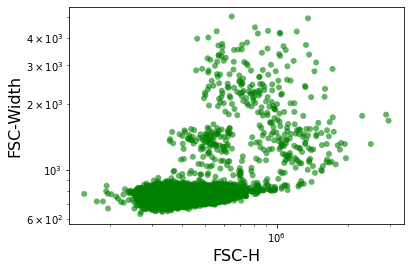

In [13]:
gated_sample_cyano.plot(['FSC-H', 'FSC-Width'], kind='scatter', alpha=0.6, color='green'); 
plt.xscale('log')
plt.yscale('log')

## Differentiation between heterotrophic cells
Based on that initial separation of phototrophic and heterotrophic cells, the two heterotrophic populations can be distinguished based on their fluorescent markers eGFP in the **FITC-H** channel and mKate2 in the **PC5.5** channel.

We can also apply simple gates based on the initial histograms.

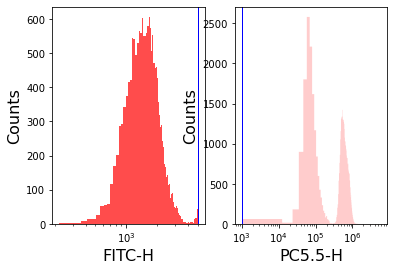

In [14]:
# you may additionally consider to apply transformation
tsample = sample.transform('hlog', channels=['PC5.5-H', 'FITC-H'], b=500.0)

ax1 = plt.subplot(121);

gate_nocyano = ThresholdGate(7000.0, ['APC-H'], region='below')
gated_nocyano = tsample.gate(gate_nocyano)

# use TresholdGate to filter noise below 10**2
noise_gate = ThresholdGate(100.0, ['FITC-H'], region='above')
no_noise_sample = tsample.gate(noise_gate)

# use TresholdGate to filter only values above 10000
fit_gate = ThresholdGate(5000.0, ['FITC-H'], region='below')

# apply the Gate to the sample
gated_sample = tsample.gate(fit_gate)

# use TresholdGate to filter only values above 10000
pc5_gate = ThresholdGate(2000.0, ['PC5.5-H'], region='above')

union_gate2 = FlowCytometryTools.core.gates.CompositeGate(noise_gate, 'and', fit_gate)
union_gate = FlowCytometryTools.core.gates.CompositeGate(union_gate2, 'and', pc5_gate)
gated_sample = tsample.gate(union_gate)

gated_sample.plot(['FITC-H'], color='red', gates=[fit_gate], alpha=0.7, bins=100);
plt.xscale('log')


ax2 = plt.subplot(122);

# use TresholdGate to filter only values above 10000
pc5_gate = ThresholdGate(1000.0, ['PC5.5-H'], region='above')

# apply the Gate to the sample
gated_sample2 = sample.gate(pc5_gate)
gated_sample2.plot(['PC5.5-H'], color='red', gates=[pc5_gate], alpha=0.2, bins=500);
plt.xscale('log')

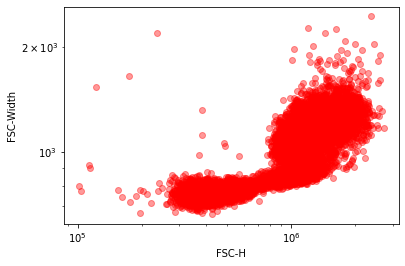

In [15]:
plt.scatter(gated_sample['FSC-H'], gated_sample['FSC-Width'], color='red', alpha=0.4, label='yeast')
plt.xlabel('FSC-H')
plt.ylabel('FSC-Width')
plt.xscale('log')
plt.yscale('log')

(100, 10000)

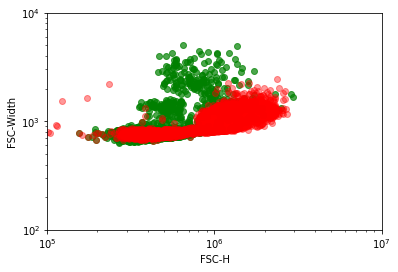

In [16]:
union_gate = FlowCytometryTools.core.gates.CompositeGate(gate_cyano, 'and', pc5_gate)
union_gate_sample = tsample.gate(union_gate)


plt.scatter(gated_sample_cyano['FSC-H'], gated_sample_cyano['FSC-Width'], color='green', alpha=0.7, label='phototroph')
plt.scatter(gated_sample['FSC-H'], gated_sample['FSC-Width'], color='red', alpha=0.4, label='yeast')
#plt.scatter(tsample['FSC-H'], tsample['FSC-Width'], color='lightgreen', alpha=0.4, label='yeast')
plt.xlabel('FSC-H')
plt.ylabel('FSC-Width')
plt.xscale('log')
plt.yscale('log')

plt.xlim(10**5, 10**7)
plt.ylim(10**2, 10**4)

#### Alternative open source softwares
These are many other open source softwares for performing data analysis on flow cytometry data. If you got interested in using open access but the mentioned package does not suit your particular needs take a first look to our second botebook or look at:
- alternative API for Python: fcm ,
- API for the R programming language: Bioconductor,
- with GUI: FlowPy, cyflogic, Flowing Software.